In [1]:
import tweepy 
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
from textblob import TextBlob 

import csv, json, codecs
import random, re

from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

import datetime, sys, os
import string, time
from datetime import datetime    

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt

In [2]:
con='3MZQA6GttIG5giaMaGGqBihig' #consumer key
con_sec='NbkfoDU7MmLbjF1djt4rw52CtzaEe4Yof2LIbFHpF9QNCb9kHE' #consumer secret key
token='1221323555998035968-7V0qaHAJ4w73cPBZLBdkdrOW2yZTg9' #token key
token_sec='B0lUNGqKYJ16zJiW11OTKUagcfOK3ardbaBblSVFRBRMX' #token secret key

In [3]:
auth_handler = OAuthHandler(con, con_sec)
auth_handler.set_access_token(token, token_sec)
api_handle = tweepy.API(auth_handler) 

### The function given below extracts tweets using a Python library called TWEEPY.
It extracts this data based on one or more search words which will be input by the user. The user will also input the date from which tweepy will start extracting the tweets. These tweets will be saved in a file, from which they will be read and further analysed.

### There are some limitations to the twitter API which are mentioned below:
    1. We can only scrape data from last 7 days using the standard search API.
    2. The API rate limit window duration is 15 minutes, ie, we can only extract once every 15 mins.

In [4]:
def Scrap_Tweets(search_key, date):    
    tweets_df = pd.DataFrame(columns = ['User', 'Text'])
    time_start = time.time()
    Tweets = tweepy.Cursor(api_handle.search, q=search_key, lang="en", since=date, tweet_mode='extended')
    Tweets = Tweets.items(2000)
    lst_tweets = [t for t in Tweets]
    noTweets = 0
    for t in lst_tweets:
        username = t.user.screen_name
        try:
            text = t.retweeted_status.full_text
        except AttributeError: 
            text = t.full_text
        t_row = [username, text]
        tweets_df.loc[len(tweets_df)] = t_row
        noTweets += 1
    time_end = time.time()
    total_time = round((time_end-time_start)/60, 2)
    print('{} tweets were scraped in {} mins'.format(noTweets, total_time))
    timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')
    fname = os.getcwd() + 'Demonetization_Tweets' + '(' + timestamp + ').csv' 
    tweets_df.to_csv(fname, index = False)
    program_end = time.time()
    print('Scraping completed!\nYour tweets are saved in a file "Demonetization_Tweets" with timestamp in the current directory')

In [5]:
#search_key = input('Enter search key word (eg- Demonetization): ')
search_key = 'Demonetization'

#date = input('Enter the date not older than last 7 days (yyyy-mm-dd):')
# Not more than 7 days older
date = '2020-05-14'

In [6]:
Scrap_Tweets(search_key, date)

2000 tweets were scraped in 3.54 mins
Scraping completed!
Your tweets are saved in a file "Demonetization_Tweets" with timestamp in the current directory


### Status code 429:
    It means that we have exceeded the Standard Twitter Search API allowance. 
    We must either wait for 15 mins or input a date which is not older than last 7 days.

In [7]:
positive=0
negative=0
neutral=0
total = 0

timestamp = datetime.today().strftime('%Y%m%d_%H%M%S')
fname = os.getcwd() + 'Demonetization_Tweets' + '(' + timestamp + ').csv'
with codecs.open(fname, "r",encoding='utf-8', errors='ignore') as file:
    fhandle = csv.reader(file)
    List_tweets = []
    List_cleantweets = []
    for row in fhandle:
        tweet = row[1].strip() 
        clean = " ".join(re.findall("[a-zA-Z]+",tweet))
        analysis = TextBlob(clean)
        List_tweets.append(tweet) 
        List_cleantweets.append(clean)
        total = total + 1
        if (analysis.sentiment.polarity > 0):
            positive += 1
        elif (analysis.sentiment.polarity == 0):
            neutral += 1
        else:
            negative += 1

In [8]:
print('Number of Positive tweets = ',positive)
print('Number of Negative tweets = ',negative)
print('Number of Neutral tweets = ',neutral)    

Number of Positive tweets =  1937
Number of Negative tweets =  32
Number of Neutral tweets =  32


In [9]:
tweets = pd.DataFrame(data = List_tweets, columns = [0])
tweets.columns = tweets.iloc[0]
tweets = tweets[1:]
tweets

,Text
1,"Modiji, you are completing 6 yrs as Prime Mini..."
2,"Modiji, you are completing 6 yrs as Prime Mini..."
3,"Modiji, you are completing 6 yrs as Prime Mini..."
4,"Modiji, you are completing 6 yrs as Prime Mini..."
5,"Modiji, you are completing 6 yrs as Prime Mini..."
...,...
1996,"Modiji, you are completing 6 yrs as Prime Mini..."
1997,"Modiji, you are completing 6 yrs as Prime Mini..."
1998,"Modiji, you are completing 6 yrs as Prime Mini..."
1999,"Modiji, you are completing 6 yrs as Prime Mini..."


In [10]:
#Finding the hashtags in all the tweets
hashs = []
hashtag_count = {}
for tweet in List_tweets:
    hashs.append(re.findall(r"#(\w+)", tweet))
hash_new = [item for sub in hashs for item in sub]
count = dict(Counter(hash_new))
hashtag_count = dict(sorted(count.items(), key=lambda kv: kv[1], reverse=True))
countname = list(hashtag_count.keys())
countname[:10]

['VikasChallenge',
 'SeedhiBaatPackageBakwas',
 'BankNirbharBharat',
 '928Days',
 'India',
 'Modi',
 'NarendraModi',
 'CongressCheatedMigrants',
 'reusedcontent',
 'MigrantsOnTheRoad']

### Here, we see hashtags such as #MigrantsOnTheRoad and #WageRevision
These hashtags show that the tweets we have extracted on 'demonetization' are related to the tweets about the condition of MIGRANT WORKERS during COVID - 19 and Lockdown. This shows that people have responded to COVID - 19 and the various rules that the government had passed because of it using the example of COVID - 19.

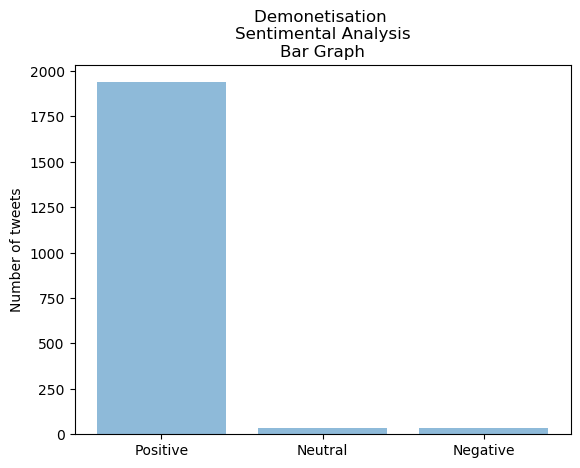

In [11]:
#Bar Graph

obj = ('Positive','Neutral','Negative')
position_y = np.arange(len(obj))
values = [positive, neutral, negative]
plt.bar(position_y, values, align='center', alpha=0.5)
plt.xticks(position_y, obj)
plt.ylabel('Number of tweets')
plt.title('Demonetisation \nSentimental Analysis\nBar Graph')
plt.show()

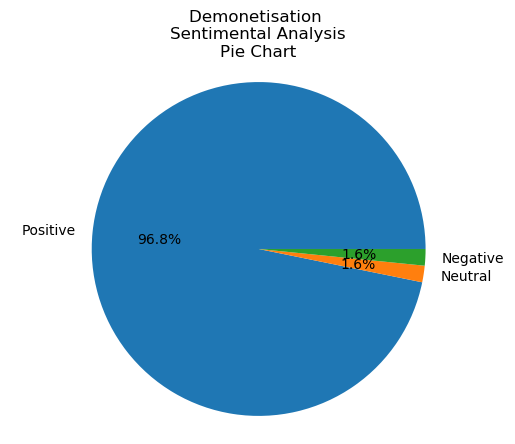

In [12]:
#Pie Graph 
plt.pie(values, explode = (0, 0, 0), labels=obj, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Demonetisation \nSentimental Analysis\nPie Chart')
plt.show()

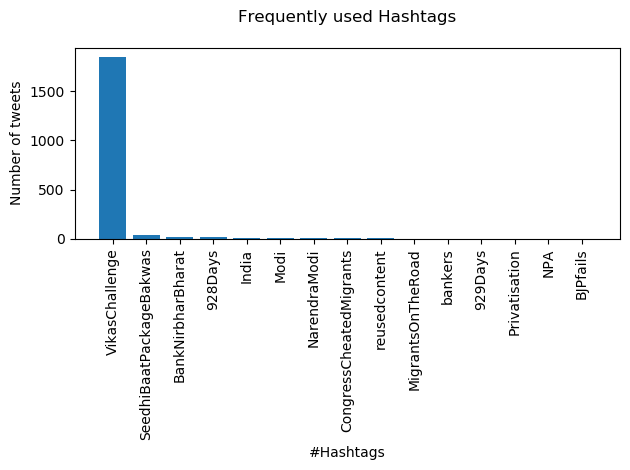

In [13]:
# Hashtag Plot
x_axis = np.arange(len(hashtag_count))[:15]
y_axis = list(hashtag_count.values())[:15]
plt.bar(x_axis, y_axis)
plt.title('Frequently used Hashtags\n')
plt.xticks(x_axis, countname[:15], rotation='vertical')
plt.ylabel('Number of tweets')
plt.xlabel('#Hashtags')
plt.tight_layout()
plt.show()

In [14]:
stopwords = set(STOPWORDS)

In [15]:
polarity = []
for i in tweets['Text'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        
    except:
        polarity.append(0)

In [16]:
tweets['polarity']=polarity

tweets['polarity'][tweets.polarity==0]= 0
tweets['polarity'][tweets.polarity > 0]= 1
tweets['polarity'][tweets.polarity < 0]= -1

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [17]:
pos_tweets = tweets[tweets.polarity==1]
neg_tweets = tweets[tweets.polarity==-1]
neu_tweets = tweets[tweets.polarity==0]

### The following 3 figures are called WORDCLOUDS. 
They show us which words have been used frequently. the larger the size of a particular word, the higher its frequencyb The first, second and third are about the positive, negative and neutral tweets respectively.

(-0.5, 999.5, 499.5, -0.5)

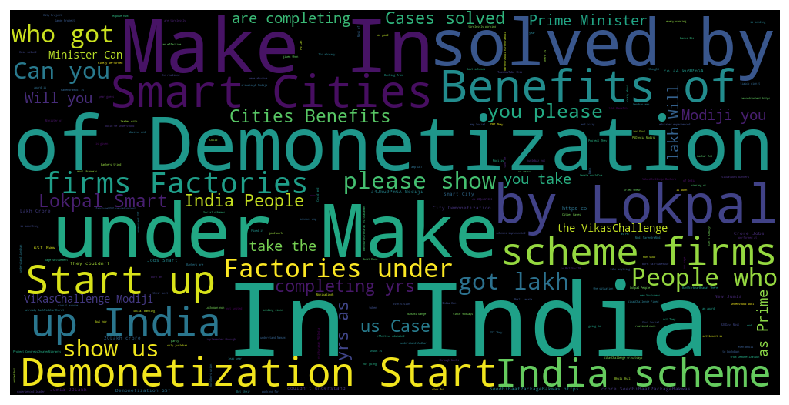

In [18]:
k = (' '.join(pos_tweets['Text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

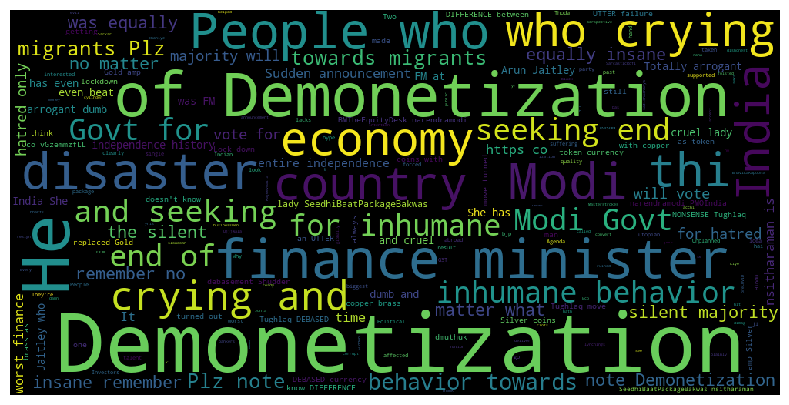

In [19]:
k = (' '.join(neg_tweets['Text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

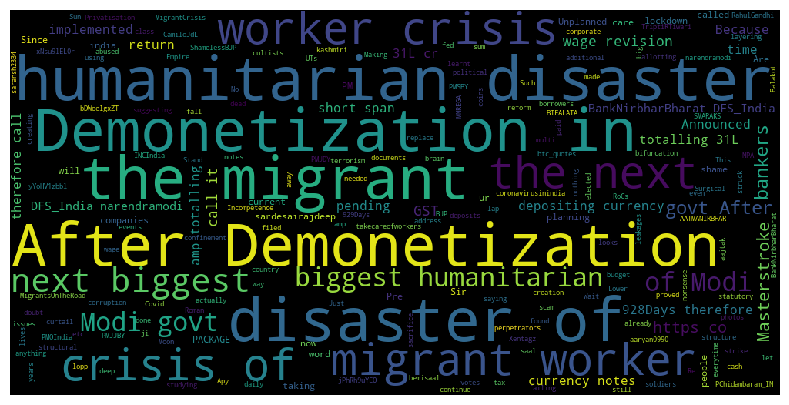

In [20]:
k = (' '.join(neu_tweets['Text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

### If we use a file of tweets that were extracted around the time that the 'Demonetization' policy had been released, we would get results as shown below-

In [25]:
positive=0
negative=0
neutral=0
total = 0

fname ="Dem_tweets.csv"
with codecs.open(fname, "r",encoding='utf-8', errors='ignore') as file:
    fhandle = csv.reader(file)
    List_tweets = []
    List_cleantweets = []
    for row in fhandle:
        tweet = row[2].strip() 
        clean = " ".join(re.findall("[a-zA-Z]+",tweet))
        analysis = TextBlob(clean)
        List_tweets.append(tweet) 
        List_cleantweets.append(clean)
        total = total + 1
        if (analysis.sentiment.polarity > 0):
            positive += 1
        elif (analysis.sentiment.polarity == 0):
            neutral += 1
        else:
            negative += 1

In [26]:
#Result
print("Total Tweets: ",total)
print('Positive = ',positive)
print('Neutral= ',neutral)
print('Negative= ',negative)    

Total Tweets:  14941
Positive =  5989
Neutral=  6723
Negative=  2229


In [29]:
#Finding the hashtags in all the tweets

hashtags = []
finalcount={}
for i in tweetsList:
    hashtags.append(re.findall(r"#(\w+)", i))
hashtagnew = [item for sub in hashtags for item in sub]
counts = Counter(hashtagnew)
counts = dict(counts)
finalcount = dict(sorted(counts.items(), key=lambda kv: kv[1], reverse=True))
countname = list(finalcount.keys())
countname

['Demonetization',
 'demonetization',
 'DeMonetization',
 'India',
 'nitishkumar',
 'demo',
 'GLvMI',
 'CorruptionFreeIndia',
 'BlackMoney',
 'Modi',
 'VijayMallya',
 'IndiaFightsCorruption',
 'DEMONETIZATION',
 'BJP',
 'NoMoneyYaar',
 'Demonetizat',
 'SonuNigam',
 'DeMonetisation',
 'RatanTata',
 'Insights',
 'bulletin',
 'boycottsnapchat',
 'RBI',
 'NarendraModi',
 'LifeInsurance',
 'demonetisation',
 'YouTubeIsDead',
 'NMApp',
 'MeraDeshBadalRaha',
 'PMModi',
 'news',
 'TrustBJP',
 'Bypolls',
 'not',
 'YouTube',
 'CGDTalks',
 'IndiaKaDil',
 'india',
 'Hilarious',
 'blackmoney',
 'Hitler',
 'WarOnCash',
 'lifehacks',
 'Doltiwal',
 'JaiChandKejriwal',
 'survey',
 'PM',
 'Delhi',
 'NorthEast',
 'ITVideo',
 'Snapchat',
 'Bitcoin',
 'NoteNahiPMBadlo',
 'NetasCASHIn',
 'payments',
 'IncrementPremierLeague',
 'ATM',
 'MayawatiNextUPCM',
 'BSP',
 'PuthanPanam',
 'summary',
 'Indias',
 'queue',
 'Pakistan',
 'Digital',
 'ModiFightsCorruption',
 'lenders',
 'cashless',
 'YSJagan',
 'Ysrcp',
 

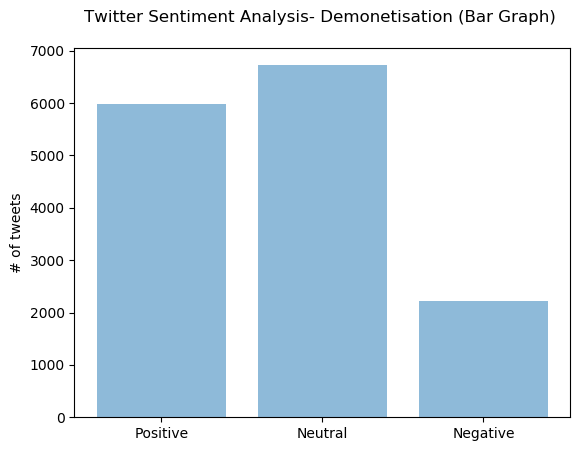

In [30]:
#Bar Graph

objects = ('Positive','Neutral','Negative')
y_pos = np.arange(len(objects))
performance = [positive,neutral,negative]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('# of tweets')
plt.title('Twitter Sentiment Analysis- Demonetisation (Bar Graph) \n')
plt.show()

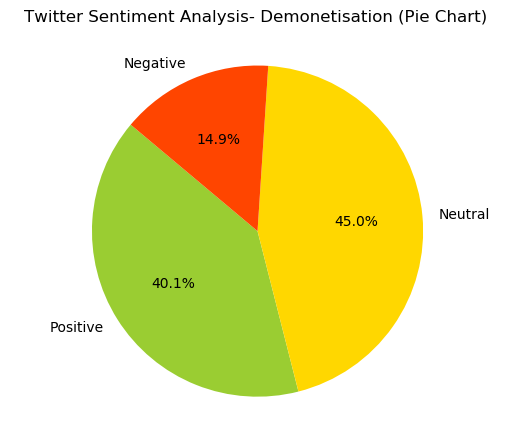

In [31]:
#Pie Graph

colors = ['yellowgreen', 'gold', 'orangered']
explode = (0, 0, 0) # explode last slice
plt.pie(performance, explode=explode, labels=objects, colors=colors,
 autopct='%1.1f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.title('Twitter Sentiment Analysis- Demonetisation (Pie Chart) \n')
plt.show()


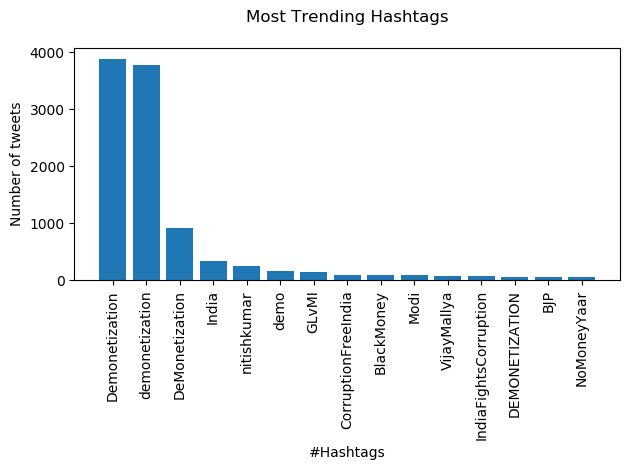

In [32]:
# Hashtag Plot

x = np.arange(len(finalcount))
y = list(finalcount.values())
x = x[:15]
y = y[:15]
countname = countname[:15]
plt.bar(x, y)
plt.title('Most Trending Hashtags\n')
plt.xticks(x, countname, rotation='vertical')
plt.ylabel('Number of tweets')
plt.xlabel('#Hashtags')
plt.tight_layout()
plt.show()

In [34]:
stopwords = set(STOPWORDS)

In [35]:
finalcount={}
for i in tweetsList:
    hashtags.append(re.findall(r"#(\w+)", i))
hashtagnew = [item for sub in hashtags for item in sub]
counts = Counter(hashtagnew)
counts = dict(counts)
finalcount = dict(sorted(counts.items(), key=lambda kv: kv[1], reverse=True))
countname = list(finalcount.keys())

In [36]:
tweets = pd.DataFrame(data = tweetsList, columns = [0])
tweets.columns = tweets.iloc[0]
tweets = tweets[1:]
tweets

,text
1,RT @rssurjewala: Critical question: Was PayTM ...
2,RT @Hemant_80: Did you vote on #Demonetization...
3,"RT @roshankar: Former FinSec, RBI Dy Governor,..."
4,RT @ANI_news: Gurugram (Haryana): Post office ...
5,RT @satishacharya: Reddy Wedding! @mail_today ...
...,...
14936,RT @saxenavishakha: Ghost of demonetization re...
14937,N d modi fans-d true nationalists of the count...
14938,RT @bharat_builder: Lol. Demonetization has fi...
14939,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...


In [37]:
polarity = []
for i in tweets['text'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        
    except:
        polarity.append(0)

In [38]:
tweets['polarity']=polarity

tweets['polarity'][tweets.polarity==0]= 0
tweets['polarity'][tweets.polarity > 0]= 1
tweets['polarity'][tweets.polarity < 0]= -1

C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Mrinali Saxena\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [39]:
pos_tweets = tweets[tweets.polarity==1]
neg_tweets = tweets[tweets.polarity==-1]
neu_tweets = tweets[tweets.polarity==0]

(-0.5, 999.5, 499.5, -0.5)

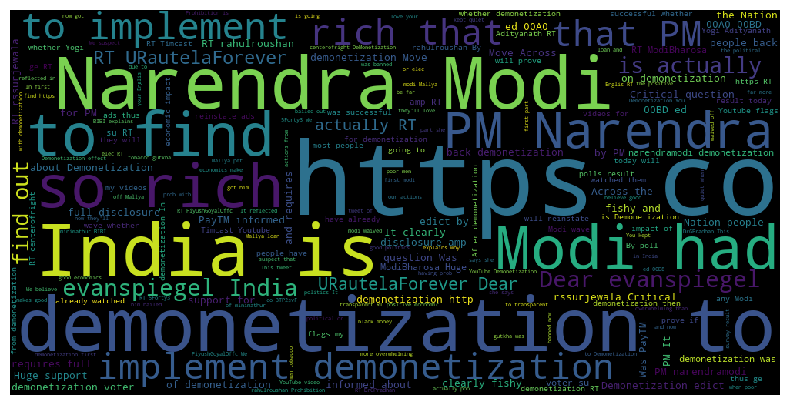

In [40]:
k = (' '.join(pos_tweets['text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

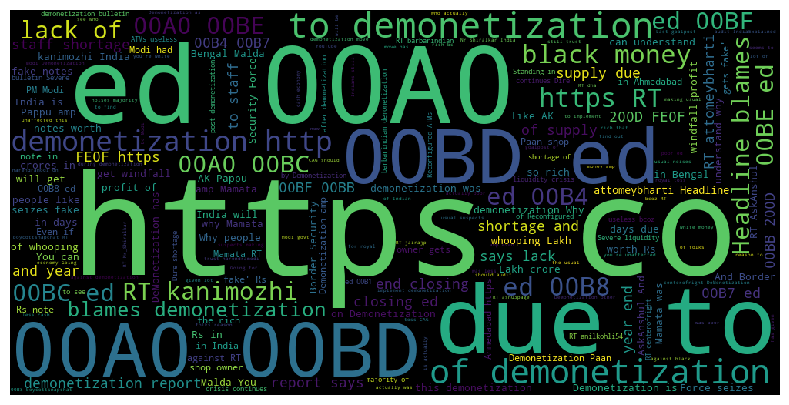

In [41]:
k = (' '.join(neg_tweets['text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

(-0.5, 999.5, 499.5, -0.5)

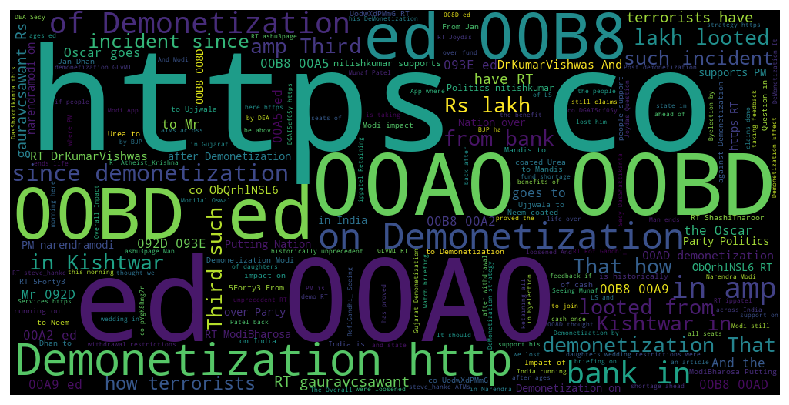

In [42]:
k = (' '.join(neu_tweets['text']))
wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')